# We visualize VibVoice+
1. We visualize the frequency distribution of the VibVoice+ datasets.
2. We visualize the correlation between vibration and speech under different conditions.

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import rc
rc('text', usetex=False)
plt.rcParams.update({'font.size': 20})
import pandas as pd
import numpy as np

In [5]:
def organize_dict_speaker(dictionary):
    new_dict = {}
    for i, key in enumerate(dictionary.keys()):
        speaker = ' '.join(key.split('_')[:2])
        date = key.split('_')[-1]
        if speaker not in new_dict:
            new_dict[speaker] = {date: dictionary[key]}
        else:
            new_dict[speaker][date] = dictionary[key]
    return new_dict
def organize_dict_date(dictionary):
    new_dict = {}
    for i, key in enumerate(dictionary.keys()):
        date = key.split('_')[-1]
        if date not in new_dict:
            new_dict[date] = [dictionary[key]]
        else:
            new_dict[date].append(dictionary[key])
    for date in new_dict.keys():
        new_dict[date] = np.mean(new_dict[date])
    return new_dict
def improvement_ratio(cer1, cer2):
    ratios = []
    for cer1_, cer2_ in zip(cer1.values(), cer2.values()):
        ratios.append((cer1_ - cer2_) / cer1_)
    return np.mean(ratios), np.std(ratios)

0.38844414576459046 0.5531976518200336
0.5201807120956093 0.1706046259290161


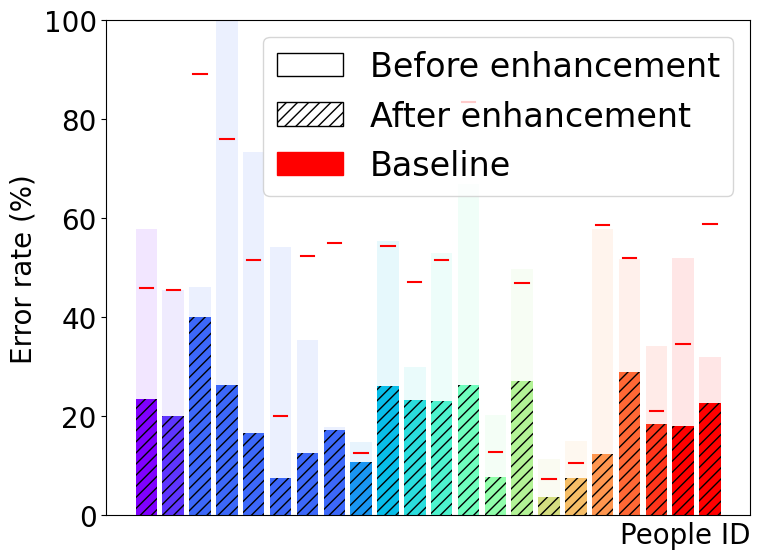

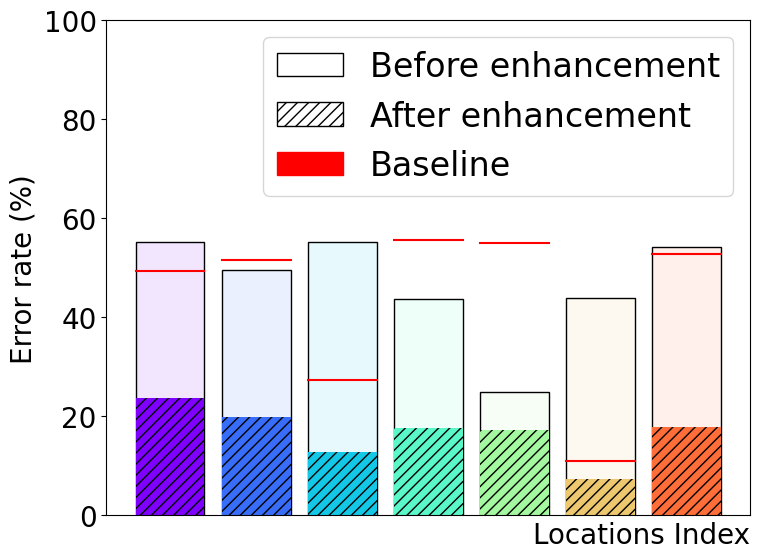

In [8]:
import pickle
mic_raw = pickle.load(open('mic_raw.pkl', 'rb'))
baseline = pickle.load(open('baseline.pkl', 'rb'))
vibvoice = pickle.load(open('saved_dict.pkl', 'rb'))
average_improve, std_improve = improvement_ratio(mic_raw, vibvoice)
print(average_improve, std_improve)
average_improve, std_improve = improvement_ratio(baseline, vibvoice)
print(average_improve, std_improve)

mic_raw = organize_dict_speaker(mic_raw)
baseline = organize_dict_speaker(baseline)
vibvoice = organize_dict_speaker(vibvoice)
speaker = ''
dates = []
j = 0
from matplotlib.pyplot import cm
fig = plt.figure(figsize=(8, 6))
color = cm.rainbow(np.linspace(0, 1, len(vibvoice.keys())))
color_light = color
color_light[:, -1] = 1
for i, speaker in enumerate(vibvoice.keys()):
    dates = mic_raw[speaker].keys()
    cer = list(mic_raw[speaker].values())
    plt.bar(range(j, j+len(dates)), cer, color=color[i] + np.array([0, 0, 0, -0.9]))
    cer_baseline = list(baseline[speaker].values())
    j_temp = j
    for base in cer_baseline:
        baseline_line = plt.plot([j_temp-0.25,j_temp+0.25], [base,base], color='r')
        j_temp += 1
    cer_vib = vibvoice[speaker].values()
    plt.bar(range(j, j+len(dates)), cer_vib, color=color[i], label=speaker, hatch='///')
    j += len(dates)
plt.ylim(0, 100)

red_patch = mpatches.Patch(color='red', label='Baseline')
incline_patch = mpatches.Patch( facecolor='white', edgecolor='black', hatch='///', label='After enhancement')
default_patch = mpatches.Patch( facecolor='white', edgecolor='black', label='Before enhancement')

plt.legend(handles=[default_patch, incline_patch, red_patch], loc='best', fontsize='large')
plt.xticks([])
plt.ylabel('Error rate (%)')
plt.xlabel('People ID', loc='right')
plt.tight_layout()
plt.savefig('wild_speakers.pdf', bbox_inches='tight')


fig = plt.figure(figsize=(8, 6))
mic_raw = pickle.load(open('mic_raw.pkl', 'rb'))
baseline = pickle.load(open('baseline.pkl', 'rb'))
vibvoice = pickle.load(open('saved_dict.pkl', 'rb'))
mic_raw = organize_dict_date(mic_raw)
baseline = organize_dict_date(baseline)
vibvoice = organize_dict_date(vibvoice)

color = cm.rainbow(np.linspace(0, 1, len(vibvoice.keys())))
color_light = color
color_light[:, -1] = 1

dates = list(mic_raw.keys())
cer = list(mic_raw.values())
cer_baseline = list(baseline.values())
cer_vib = list(vibvoice.values())

dates.remove(dates[1])
cer.remove(cer[1])
cer_baseline.remove(cer_baseline[1])
cer_vib.remove(cer_vib[1])

dates = list(range(len(dates)))
for i in dates:
    plt.bar(i, cer[i], edgecolor='black', color=color[i] + np.array([0, 0, 0, -0.9]))
    plt.plot([i-0.4,i+0.4], [cer_baseline[i],cer_baseline[i]], color='r')
    plt.bar(i, cer_vib[i], color=color[i], label=speaker, hatch='///')
plt.ylim(0, 100)

plt.ylabel('Error rate (%)')
plt.xlabel('Locations Index', loc='right')
plt.xticks([])

red_patch = mpatches.Patch(color='red', label='Baseline')
incline_patch = mpatches.Patch( facecolor='white', edgecolor='black', hatch='///', label='After enhancement')
default_patch = mpatches.Patch( facecolor='white', edgecolor='black', label='Before enhancement')

plt.legend(handles=[default_patch, incline_patch, red_patch], loc='best', fontsize='large')
plt.tight_layout()
plt.savefig('wild_locations.pdf', bbox_inches='tight')
plt.show()


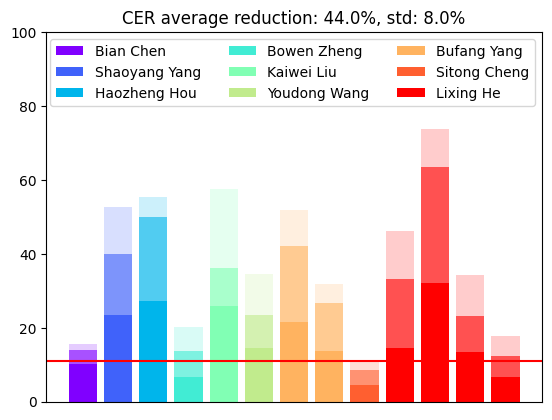

In [10]:

inp = {'Bian_Chen_2023-09-07': 15.55, 'Shaoyang_Yang_2023-09-10': 52.62, 'Haozheng_Hou_2023-09-11': 55.35, 'Bowen_Zheng_2023-09-07': 20.06, 'Kaiwei_Liu_2023-09-11': 57.47, 'Youdong_Wang_2023-09-11': 34.44, 'Bufang_Yang_2023-09-09': 51.68, 'Bufang_Yang_2023-09-05': 31.83, 'Sitong_Cheng_2023-09-07': 11.32, 'Lixing_He_2023-09-10': 46.15, 'Lixing_He_2023-09-11': 73.66, 'Lixing_He_2023-09-09': 34.3, 'Lixing_He_2023-09-05': 17.7}

baseline = {'Bian_Chen_2023-09-07': 14.02, 'Shaoyang_Yang_2023-09-10': 39.81, 'Haozheng_Hou_2023-09-11': 49.95, 'Bowen_Zheng_2023-09-07': 13.55, 'Kaiwei_Liu_2023-09-11': 36.11, 'Youdong_Wang_2023-09-11': 23.46, 'Bufang_Yang_2023-09-09': 41.99, 'Bufang_Yang_2023-09-05': 26.62, 'Sitong_Cheng_2023-09-07': 8.6, 'Lixing_He_2023-09-10': 33.17, 'Lixing_He_2023-09-11': 63.5, 'Lixing_He_2023-09-09': 23.08, 'Lixing_He_2023-09-05': 12.44}

vibvoice = {'Bian_Chen_2023-09-07': 10.26, 'Shaoyang_Yang_2023-09-10': 23.5, 'Haozheng_Hou_2023-09-11': 27.17, 'Bowen_Zheng_2023-09-07': 6.73, 'Kaiwei_Liu_2023-09-11': 25.88, 'Youdong_Wang_2023-09-11': 14.56, 'Bufang_Yang_2023-09-09': 21.49, 'Bufang_Yang_2023-09-05': 13.79, 'Sitong_Cheng_2023-09-07': 4.58, 'Lixing_He_2023-09-10': 14.6, 'Lixing_He_2023-09-11': 32.04, 'Lixing_He_2023-09-09': 13.36, 'Lixing_He_2023-09-05': 6.71}

average_improve, std_improve = improvement_ratio(baseline, vibvoice)
inp = organize_dict(inp)
baseline = organize_dict(baseline)
vibvoice = organize_dict(vibvoice)
speaker = ''
dates = []
j = 0
from matplotlib.pyplot import cm
color = cm.rainbow(np.linspace(0, 1, len(vibvoice.keys())))
color_light = color
color_light[:, -1] = 1
for i, speaker in enumerate(vibvoice.keys()):
    dates = inp[speaker].keys()
    cer = inp[speaker].values()
    plt.bar(range(j, j+len(dates)), cer, color=color[i] + np.array([0, 0, 0, -0.8]))
    cer_baseline = baseline[speaker].values()
    plt.bar(range(j, j+len(dates)), cer_baseline, color=color[i] + np.array([0, 0, 0, -0.4]))
    cer_vib = vibvoice[speaker].values()
    plt.bar(range(j, j+len(dates)), cer_vib, color=color[i], label=speaker)
    j += len(dates)
plt.axhline(y=11, color='r', linestyle='-')
plt.ylim(0, 100)
plt.legend(ncol=3)
plt.title('CER average reduction: ' + str(round(average_improve, 2) * 100) + '%, std: ' + str(round(std_improve, 2) * 100) + '%')
plt.xticks([])
plt.show()